# Análisis de la Data Universitaria 

#### Integrantes 
Juan Francisco Peláez Becerra

Diana Fernanda Tixi Uyaguari

#### Fecha: 23/04/2022


In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
#import plotly.graph_objects as go

In [92]:
#Leemos todos los csv
dfx = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2016_2017_49_marzo2022.xlsx') 
df1 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2017_2017_50_marzo2022.xlsx') 
df2 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2017_2018_51_marzo2022.xlsx')
df3 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2018_2018_52_marzo2022.xlsx')
df4 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2018_2019_53_marzo2022.xlsx')
df5 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2019_2019_54_marzo2022.xlsx')
df6 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2019_55_marzo2022.xlsx')
df7 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2020_56_marzo2022.xlsx')
df8 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2020_2021_57_marzo2022.xlsx')
df9 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2021_2021_58_marzo2022.xlsx')
df0 = pd.read_excel('./DataCleaning/DataCleaning/Numero_grupos_ofertados_cohorte_2021_2022_59_marzo2022.xlsx')

In [93]:
#Concatenamos todos los archivos
df = pd.concat([dfx, df1, df2, df3, df4, df5, df6, df7, df8, df9, df0], ignore_index = True)
df.head()

,COHORTE,PERÍODO ACADÉMICO CURSA,SEDE,CAMPUS,CARRERA,ÁREA,MODALIDAD,TIPO PROYECTOEDUCATIVO,NRO ALUMNOS
0,2016 - 2017,2016 - 2017,GUAYAQUIL,CENTENARIO,COMPUTACIÓN,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,69
1,2016 - 2017,2016 - 2017,GUAYAQUIL,CENTENARIO,ELECTRICIDAD,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,50
2,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,COMPUTACIÓN,CIENCIA Y TECNOLOGÍA,PRESENCIAL,NUEVA O REDISEÑO,124
3,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,EDUCACIÓN BÁSICA,EDUCACION,PRESENCIAL,NUEVA O REDISEÑO,38
4,2016 - 2017,2016 - 2017,MATRIZ CUENCA,EL VECINO,EDUCACIÓN INICIAL,EDUCACION,PRESENCIAL,NUEVA O REDISEÑO,28


In [94]:
#Limpieza de datos
df.drop(df[df['PERÍODO ACADÉMICO CURSA'] == '2022 - 2022'].index, inplace = True)
len(df.index)

2947

In [95]:
cohortes = df.COHORTE.unique()
sedes = df.SEDE.unique()
campus = df.CAMPUS.unique()
carreras = df.CARRERA.unique()

In [96]:
df.to_csv("DataUPS.csv", sep=";",index = False)

### Como se deberia analizar la data universitaria?
De forma global?<br>
Por Sede?<br>
Por Area?<br>
Por carrera?<br>
Por cohorte?<br>
Al nivel minimo de granuladidad (sede-carrera-cohorte)?

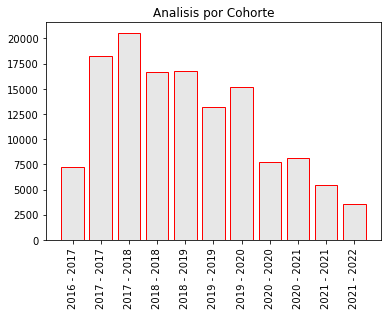

In [97]:
#A nivel de cohortes
cohovalues = []
for coho in cohortes:
    dx = df.loc[df['COHORTE'] == coho]
    cohovalues.append(dx['NRO ALUMNOS'].sum())

plt.figure()
plt.xticks(rotation = 90)
plt.title("Analisis por Cohorte")
barras = plt.bar(cohortes, cohovalues, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')

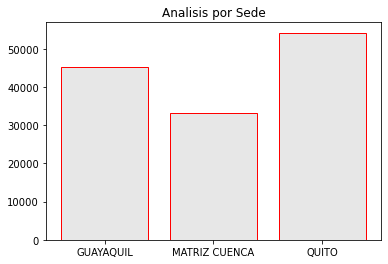

In [98]:
#A nivel de sede
sedevalues = []
for sede in sedes:
    dx = df.loc[df['SEDE'] == sede]
    sedevalues.append(dx['NRO ALUMNOS'].sum())

plt.figure()
plt.title("Analisis por Sede")
barras = plt.bar(sedes, sedevalues, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')

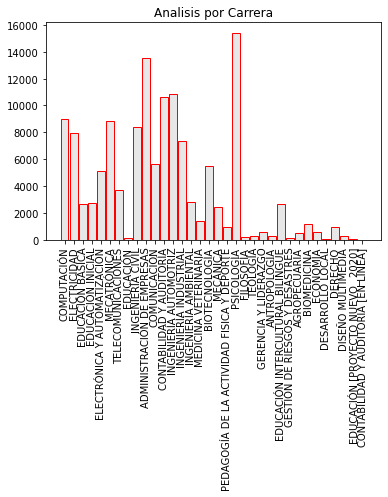

In [99]:
#A nivel de carrera
carrvalues = []
for carrera in carreras:
    dx = df.loc[df['CARRERA'] == carrera]
    carrvalues.append(dx['NRO ALUMNOS'].sum())

plt.figure()
plt.xticks(rotation = 90)
plt.title("Analisis por Carrera")
barras = plt.bar(carreras, carrvalues, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')


### Conclusión 
El análisis de la data universitaria se realiza como enfoque principal por número de cohorte, por ello se ha creado un solo dataset el cual contiene todos los datos de los periodos academicos (49 -50 -51 -52 -53 -54 - 55 - 56 - 57 - 58 -59) con el proposito de realizar un analisis para identificar el numero de estudiantes desertados con respecto a los años en comparacion, de tal forma se pueda indigar el porque de dicho número. El la grafica se puede visualizar que en los periodos 2020-2020, 2020-2021, 2021-2021, 2021-2022 se tiene un menor porcentaje con respecto a los periodos anterios, se plantea que este bajo porcentaje fue a causa de la crisis sanitaria COVID-19, la cual hizo desertar a varios estudiantes ya sea por motivos economicos, personales o academicos.

Despues de realizar el análisis por cohorte se considera importante realizar un análisis por sede y carreras ya que este nos podria aportar informacion fundamental para un análisis mas profundo. Al realizar el análisis por sede se puede visualizar que la sede con mayor numero de cohorte es Quito, la sede que le presede es Guayaquil y finalmente la sede con menor porcentaje es Cuenca, se plantea la hipotesis, que el resultado de menor porcentaje para la sede Cuenca es debido al menor número de estudiantes con respecto a Quito y Guayaquil, pues Cuenca es la cuidad con menor número de población en comparacion con las dos sedes presentes. Finalamente se realizo un análisis por carreras para conocer el número total de cohorte en los periodios (49 -50 -51 -52 -53 -54 - 55 - 56 - 57 - 58 -59) de tal forma se pueda ver las carreras con mayor y menor porcentaje, dando paso a un análisis de la demanda de estudiante por carrera. 
